In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
data = pd.read_excel('diabets.xlsx')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
x_data = data.drop('Outcome', axis=1).values
y_data = data[['Outcome']].values.reshape(-1,1)
clf = KNeighborsClassifier(5)
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)
print('accuracy score is: ', metrics.accuracy_score(y_test,y_pred))

accuracy score is:  0.7532467532467533


In [36]:
#find best number for k
k = 50
acc = np.zeros(k)
for i in range(1,k+1):
    clf = KNeighborsClassifier(i)
    x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
    clf.fit(x_train,y_train.ravel())
    y_pred = clf.predict(x_test)
    acc[i-1] = metrics.accuracy_score(y_test,y_pred)
print(acc)

[0.61688312 0.71428571 0.72077922 0.77272727 0.75324675 0.77922078
 0.75974026 0.77922078 0.77272727 0.79220779 0.76623377 0.78571429
 0.79220779 0.79220779 0.79220779 0.79220779 0.78571429 0.78571429
 0.7987013  0.79220779 0.7987013  0.7987013  0.7987013  0.79220779
 0.79220779 0.78571429 0.7987013  0.79220779 0.79220779 0.77922078
 0.79220779 0.7987013  0.7987013  0.78571429 0.79220779 0.77922078
 0.77922078 0.78571429 0.78571429 0.77922078 0.77922078 0.76623377
 0.77272727 0.76623377 0.77272727 0.77272727 0.77272727 0.77272727
 0.76623377 0.76623377]


In [37]:
print('min acc is: ', np.min(acc))
print('max acc is: ', np.max(acc))

min acc is:  0.6168831168831169
max acc is:  0.7987012987012987


In [24]:
#another way for find best number for k
k = 50
train_acc = []
test_acc = []
acc = np.zeros(k)
for i in range(1,k+1):
    clf = KNeighborsClassifier(i)
    x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
    clf.fit(x_train,y_train.ravel())
    train_acc.append(clf.score(x_train,y_train))
    test_acc.append(clf.score(x_test,y_test))
    acc[i-1] = metrics.accuracy_score(y_test,y_pred)
print(acc)

[0.76623377 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377
 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377
 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377
 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377
 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377
 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377
 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377
 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377 0.76623377
 0.76623377 0.76623377]


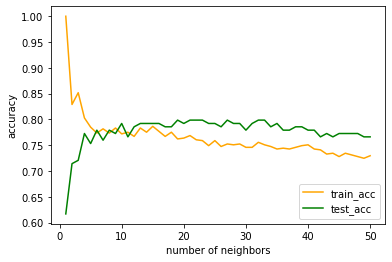

In [27]:
#we can see best number for k in plot
p = range(1,51)
plt.plot(p,train_acc, color='orange', label='train_acc')
plt.plot(p,test_acc, color='green', label='test_acc')
plt.ylabel('accuracy')
plt.xlabel('number of neighbors')
plt.legend(loc=4)
plt.show()

In [44]:
model = KNeighborsClassifier(n_neighbors=5)
parameters = {'n_neighbors': range(1,50)}
grid_kn = GridSearchCV(estimator = model,
                      param_grid = parameters,
                      scoring = 'accuracy',
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_kn.fit(x_train, y_train.ravel())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [45]:
grid_kn.best_params_

{'n_neighbors': 21}